# Non-linear Fitting

Up till now, all our data analysis involved fitting an N-dimensional polynomial to the data. However, this will not give us correct fits if the underlying data follows a different behaviour, such as an exponential. In this notebook we'll see how we can fit data to arbitrary functions by using SciPy's `optimize.curve_fit` function. We'll demonstrate this by using one of the first year lab experiments: The field-effect transistor (JFET). Recall the experiment description

### Experiment description

This is an experiment to determine the IV characteristics of a JFET. A junction gate field-effect transistor (JFET) is the simplest type of field transistor. Electrons flow between Source and Drain terminals, while applying a potential difference over the gate impedes this flow, thus reducing the current. 

Once the circuit is constructed, it is turned on and the resistance is varied. For each resistance the voltage is recorded, and thus the current is determined. 

For the purpose of this notebook, the experiment readings have already been performed and we need to perform the required data analysis. The resulting measurements are stored in [this excel file](data/jfet_data.xlsx). 

### Data Analysis

Theory suggests that

$$ I_d\propto(V_T - V_S)^a $$

where $V_T$ is the source-drain potential difference when $I_d$ is 0 and $a=2$. Here we will investigate this relationship by fitting a power curve to the data.

We can load the data using pandas:

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Read excel file using pandas
data = pd.read_excel('data/jfet_data.xlsx', 0)

# Display data
data

,R,V1,V2
0,100,0.47,0.47
1,200,0.74,0.74
2,300,0.91,0.92
3,400,1.04,1.05
4,500,1.14,1.15
5,600,1.23,1.23
6,700,1.29,1.29
7,800,1.35,1.35
8,900,1.40,1.40
9,1000,1.44,1.44


As you can see, the data in the excel file consists of multiple rows which show the readings for a different resistance value. For each row there are two measurements of the voltage. First we should find the average voltage for each row:

In [4]:
average_V =  0.5 * (data['V1'] + data['V2'])

Next we'll determine the current for each row by using Ohm's law

In [5]:
current = average_V / data['R']

Let's plot the data and see what it looks like

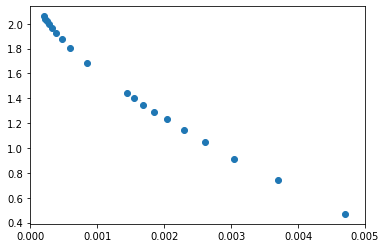

In [6]:
from matplotlib import pyplot as plt

# Enable inline plotting
%matplotlib inline

# Plot the data
plt.scatter(current, average_V)
plt.xlim(0, 0.005) #  Limit the x-axis
plt.show()

We need to fit a curve this data. We know that the relationship between $I_d$ and $V_S$ is $ I_d\propto(V_T - V_S)^a$, so we need to fit a power law. We'll use `scipy.optimize.curve_fit` for this, which is able to fit any function to provided data points through non-linear least squares minimization. Note that the equation is not an equality but a proportionaly, so we need to factor this into account. We can change this into an equality equation by adding a factor: $ I_d=k(V_T - V_S)^a$.

We must first define a function which, given measurements $V_S$ and a value for $V_T$, $k$ and $a$, will return the current:

In [7]:
def fit_func(v_s, v_t, k, a):
    return k * (np.power(v_t - v_s, a))

We'll use this function for the fitting as follows

In [8]:
from scipy.optimize import curve_fit

# First argument is the function we want to fit
# Second argument is the x_data (in this case current)
# Third argument is the y_data (in this case average_V)
popt, pcov = curve_fit(fit_func, average_V, current, p0=(2.5, 1, 1))

`curve_fit` return two items: `popt` which are the calculated optimal values for the parameters (so in this case, `popt[0]` is the value for $V_T$, `popt[1]` is the value for `k` and `popt[2]` is the value for `a`), and `pcov` which is the estimated covariance of `popt`.

In [10]:
print(f"Value for $V_T$ is {popt[0]:4f}")
print(f"Value for $k$ is {popt[1]:4f}")
print(f"Value for $a$ is {popt[2]:4f}")

Value for $V_T$ is 2.298123
Value for $k$ is 0.001835
Value for $a$ is 1.564918


Let's use the value from `popt` to generate the fitted line:

In [14]:
fitted_line = fit_func(average_V, popt[0], popt[1], popt[2])

Finally, generate the final plot showing data points and the fit

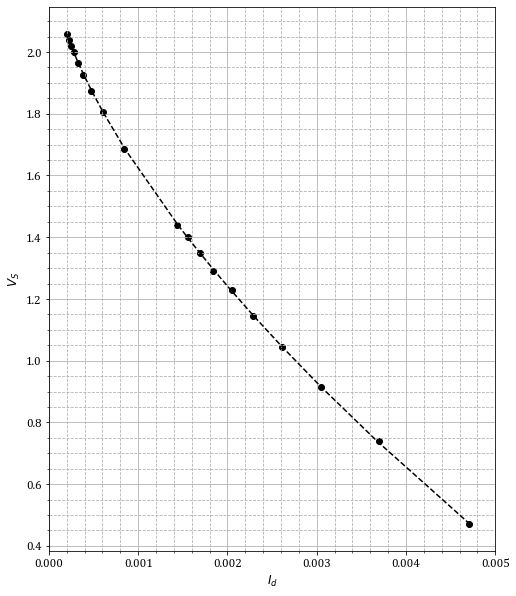

In [15]:
# Set the font to Cambria and size 12
plt.rcParams["font.family"] = "Cambria"
plt.rcParams["font.size"] = 12
plt.rcParams["font.weight"] = "normal"

# Create figure and set size
f = plt.figure(figsize=(8, 10))

# Include data points
plt.scatter(current, average_V, color='k')

# Include fit
plt.plot(fitted_line, average_V, 'k--')

# Enable minor ticks so that we can show a fine grid
plt.minorticks_on()
plt.grid(b=True, which='major', linestyle='-')
plt.grid(b=True, which='minor', linestyle='--')

# Display labels
plt.xlabel(r"$I_d$")
plt.ylabel(r"$V_S$")

# Final adjustments
plt.xlim(0, 0.005)
plt.show()

***
The following files contain experiment data for some of the first years experiment you preformed last year. You can practice producing error bars through them:
* [The compound pendulum A](data/compound_pendulum_data.xlsx)
* [Discharging a capacitor](data/capacitor_data.xlsx)